In [ ]:
!sudo apt-get --reinstall install ttf-mscorefonts-installer

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cabextract distro-info libfontenc1 libmspack0 python3-chardet
  python3-debconf python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ubuntu-advantage-tools ubuntu-pro-client
  ubuntu-pro-client-l10n ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils zstd
Suggested packages:
  shunit2
The following NEW packages will be installed:
  cabextract distro-info libfontenc1 libmspack0 python3-chardet
  python3-debconf python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ttf-mscorefonts-installer
  ubuntu-advantage-tools ubuntu-pro-client ubuntu-pro-client-l10n
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils zstd
0 upgraded, 21 newly installed, 0 to remove an

In [ ]:
! fc-list

/usr/share/fonts/truetype/msttcorefonts/comicbd.ttf: Comic Sans MS:style=Bold,Negreta,tučné,fed,Fett,Έντονα,Negrita,Lihavoitu,Gras,Félkövér,Grassetto,Vet,Halvfet,Pogrubiony,Negrito,Полужирный,Fet,Kalın,Krepko,Lodia
/usr/share/fonts/truetype/arphic/uming.ttc: AR PL UMing TW MBE:style=Light
/usr/share/fonts/truetype/msttcorefonts/comic.ttf: Comic Sans MS:style=Regular,Normal,obyčejné,Standard,Κανονικά,Normaali,Normál,Normale,Standaard,Normalny,Обычный,Normálne,Navadno,Arrunta
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK SC:style=Bold
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK TC:style=Bold
/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf: Times New Roman:style=Regular,Normal,obyčejné,Standard,Κανονικά,Normaali,Normál,Normale,Standaard,Normalny,Обычный,Normálne,Navadno,thường,Arrunta
/usr/share/fonts/truetype/msttcorefonts/courbi.ttf: Courier New:style=Bold Italic,Negreta cursiva,tučné kurzíva,fed kursiv,Fett Kursiv,Έντονα Πλάγ

In [ ]:
import matplotlib.font_manager as fm
for fontpath in fm.findSystemFonts():
    fm.fontManager.addfont(fontpath)

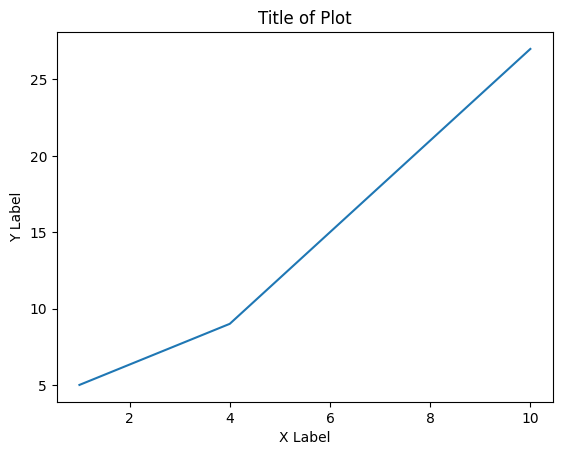

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Times New Roman'
#define x and y
x = [1, 4, 10]
y = [5, 9, 27]

#create line plot
plt.plot (x, y)

#add title and axis labels
plt.title('Title of Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')

#display plot
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/all_ria

/content/drive/MyDrive/all_ria


In [ ]:
!pip install bigartm10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import artm

from tqdm import trange

In [ ]:
def print_measures(model_plsa):
    print('Sparsity Phi: {0:.3f} (PLSA)'.format(
        model_plsa.score_tracker['SparsityPhiScore'].last_value))

    print('Sparsity Theta: {0:.3f} (PLSA)'.format(
        model_plsa.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (PLSA)'.format(
        model_plsa.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (PLSA)'.format(
        model_plsa.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (PLSA)'.format(
        model_plsa.score_tracker['PerplexityScore'].last_value))

In [ ]:
def print_scores(scores, save=None, many=False):
    print_measures(model_plsa)
    plt.figure()
    phi, theta = None, None
    if many:
        for scores_dict in scores:
            phi, = plt.plot(scores_dict['SparsityPhiScore'], 'r--', linewidth=2, alpha=0.3)
            theta, = plt.plot(scores_dict['SparsityThetaScore'], 'b--', linewidth=2, alpha=0.3)
    else:
        phi, = plt.plot(scores['SparsityPhiScore'].value, 'r--', linewidth=2)
        theta, = plt.plot(scores['SparsityThetaScore'].value, 'b--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('Sparsity')
    plt.legend([phi, theta], ['Phi sparsity', 'Theta sparsity'])
    plt.grid(True)
    if save:
        plt.savefig(save+"_sparsity.eps", format='pdf', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.figure()
    contrast, purity = None, None
    if many:
        for scores_dict in scores:
            contrast, = plt.plot(scores_dict['TopicKernelScore'].average_contrast, 'r', linewidth=2, alpha=0.3)
            purity, = plt.plot(scores_dict['TopicKernelScore'].average_purity, 'b', linewidth=2, alpha=0.3)
    else:
        contrast, = plt.plot(scores['TopicKernelScore'].average_contrast, 'r', linewidth=2)
        purity, = plt.plot(scores['TopicKernelScore'].average_purity, 'b', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('Contrast/Purity')
    plt.grid(True)
    plt.legend([contrast, purity], ['Average contrast', 'Average purity'])
    if save:
        plt.savefig(save+"_contrast_purity.eps", format='pdf', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.figure()
    perp = None
    if many:
        for scores_dict in scores:
            perp, = plt.plot(scores_dict['PerplexityScore'].value, 'b--', linewidth=2, alpha=0.3)
    else:
        perp, = plt.plot(scores['PerplexityScore'].value, 'b--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('Perplexity')
    plt.xlim(1)
    plt.legend([perp], ['Model perplexity'])
    plt.grid(True)
    if save:
        plt.savefig(save+"_perplexity.eps", format='pdf', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
    plt.show()

In [ ]:
batch_vectorizer = None
if len(glob.glob(os.path.join('batches', '*.batch'))) < 1:
  batch_vectorizer = artm.BatchVectorizer(data_path='ria', data_format='bow_uci',
                                                collection_name='ria', target_folder='batches')
else:
  batch_vectorizer = artm.BatchVectorizer(data_path='batches', data_format='batches')

In [ ]:
dictionary = artm.Dictionary()
dictionary.gather(data_path='batches')
dictionary.save(dictionary_path='batches/dictionary')


dictionary.load(dictionary_path='batches/dictionary.dict')

In [ ]:
parameters = {
    'num_topics': 100,
    'num_collection_passes': 20,
    'num_document_passes': 1
}

num_topics = parameters['num_topics']
num_collection_passes = parameters['num_collection_passes']
num_document_passes = parameters['num_document_passes']

topic_names = ['@topic_'+str(i) for i in range(num_topics)]

In [ ]:
model_plsa = artm.ARTM(topic_names=topic_names, cache_theta=True)

model_plsa.initialize(dictionary=dictionary)

tokens_class = "@default_class"
model_plsa.class_ids = {tokens_class: 1.0}

model_plsa.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                               dictionary=dictionary))
model_plsa.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_plsa.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_plsa.scores.add(artm.TopicKernelScore(name='TopicKernelScore',
                                            probability_mass_threshold=0.3))
#model_plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=15))

In [ ]:
model_plsa.num_document_passes = num_document_passes

model_plsa.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

In [ ]:
model_plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=15))

model_plsa.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=25)

In [ ]:
for topic_name in model_plsa.topic_names:
    print(topic_name + ': ')
    print(model_plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


@topic_0: 
['исследование', 'ученый', 'продукт', 'журнал', 'обнаруживать', 'клетка', 'изучать', 'мозг', 'эксперимент', 'университет', 'статья', 'использовать', 'влиять', 'страдать', 'организм']
@topic_1: 
['президент', 'владимир', 'путин', 'глава', 'вица', 'заявлять', 'секретарь', 'спикер', 'песок', 'государство', 'кремль', 'парламентарий', 'госдума', 'советник', 'комитет']
@topic_2: 
['партия', 'германия', 'греция', 'немецкий', 'демократический', 'парламентский', 'оппозиционный', 'фрг', 'канцлер', 'политик', 'править', 'греческий', 'политический', 'депутат', 'берлин']
@topic_3: 
['принимать', 'международный', 'участие', 'процесс', 'предложение', 'необходимость', 'готовый', 'отмечать', 'решение', 'швеция', 'заявка', 'подчеркивать', 'представитель', 'заявлять', 'дальнейший']
@topic_4: 
['экономический', 'миллиард', 'фонд', 'финансовый', 'условие', 'курс', 'финансирование', 'долг', 'бюджет', 'евро', 'увеличивать', 'обязательство', 'финансы', 'расход', 'механизм']
@topic_5: 
['рф', 'крым'

Sparsity Phi: 0.881 (PLSA)
Sparsity Theta: 0.030 (PLSA)
Kernel contrast: 0.814 (PLSA)
Kernel purity: 0.714 (PLSA)
Perplexity: 1611.553 (PLSA)


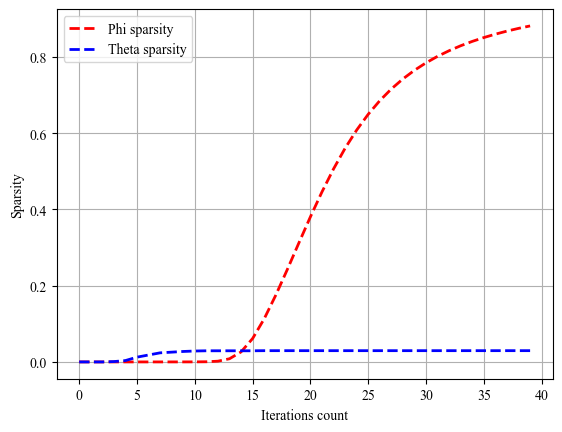

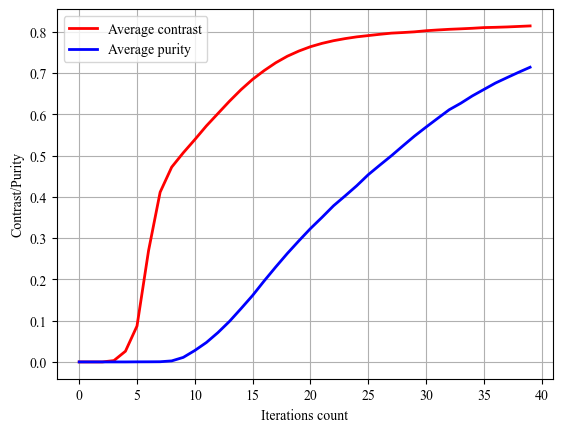

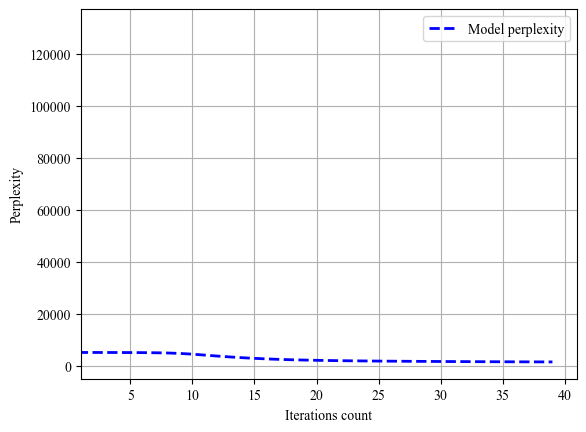

In [ ]:
print_scores(model_plsa.score_tracker, save='Ria-PLSA', many=False)

In [ ]:
phi = model_plsa.get_phi(class_ids=[tokens_class]).values

In [ ]:
def get_corr_matrix(phi):
    df = pd.DataFrame(phi)
    return df.corr()

corr_matrix = get_corr_matrix(phi).values

In [ ]:
def plot_corr_matrix(matrix, save=None):
    f, ax = plt.subplots(figsize=(20, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(matrix, cmap='Greens', vmin=0.0,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    ax.set_title('Topic-topic correlation matrix')
    if save:
        plt.savefig(save, format='eps', dpi=1000, bbox_inches='tight', pad_inches=0)

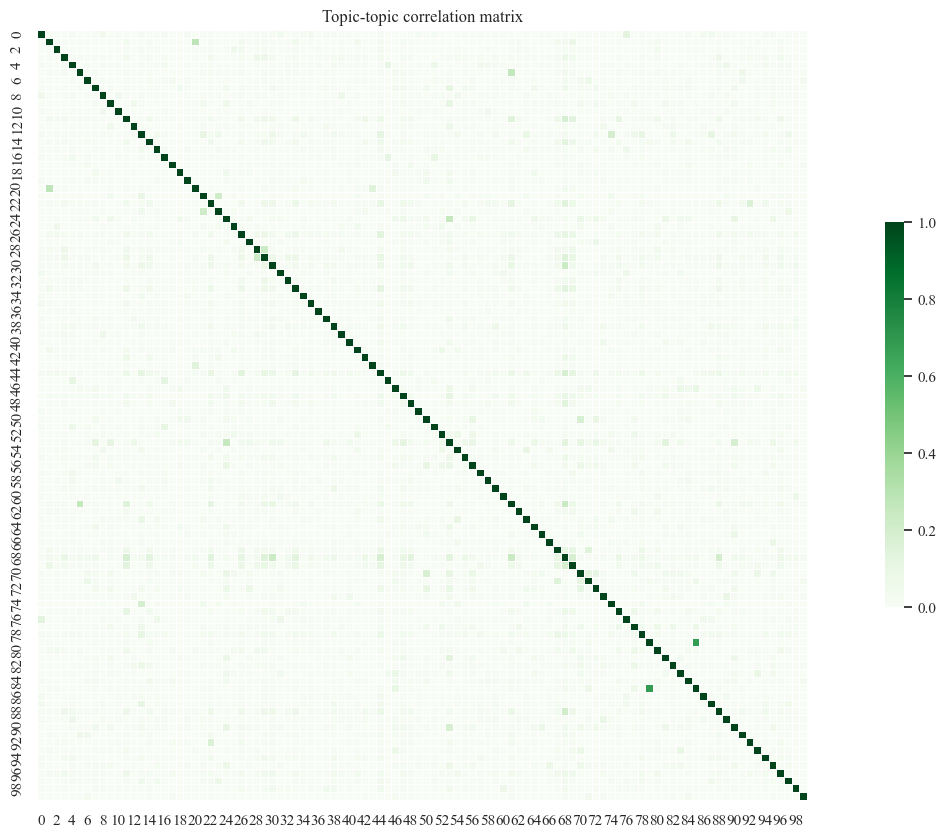

In [ ]:
plot_corr_matrix(corr_matrix, save='Ria-PLSA_corr.eps')

In [ ]:
theta = model_plsa.get_theta().values
phi = model_plsa.get_phi().values

In [ ]:
def plot_matrix(matrix, figsize=(20,15), xlabel='', ylabel='', title='', save=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.binary)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    if save:
        plt.savefig(save, format='eps', dpi=1000, bbox_inches='tight', pad_inches=0)
    print(np.any(np.isnan(matrix)))

<>:2: DeprecationWarning: invalid escape sequence '\T'


False


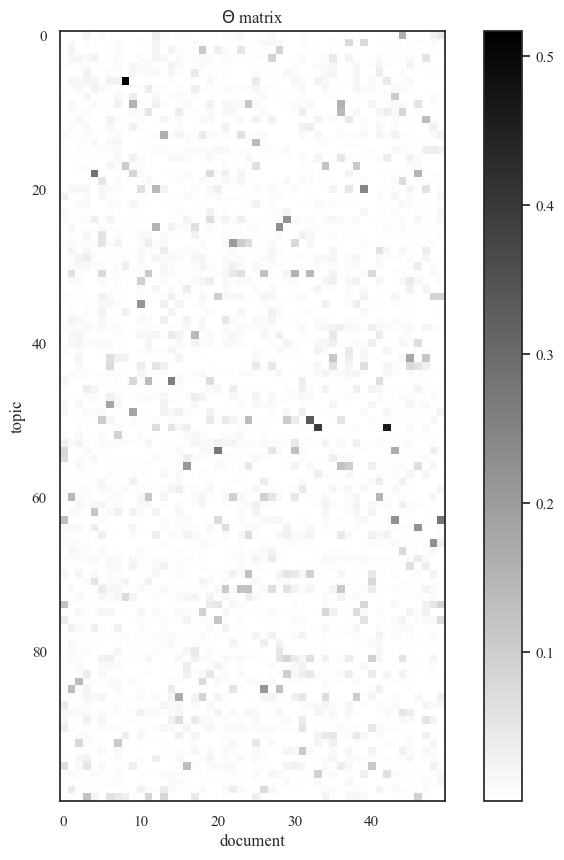

In [ ]:
plot_matrix(theta[:,:50], figsize=(10,10), xlabel='document', ylabel='topic',
            title='$\Theta$ matrix', save='Ria-PLSA_Theta.eps')

<>:2: DeprecationWarning: invalid escape sequence '\P'


False


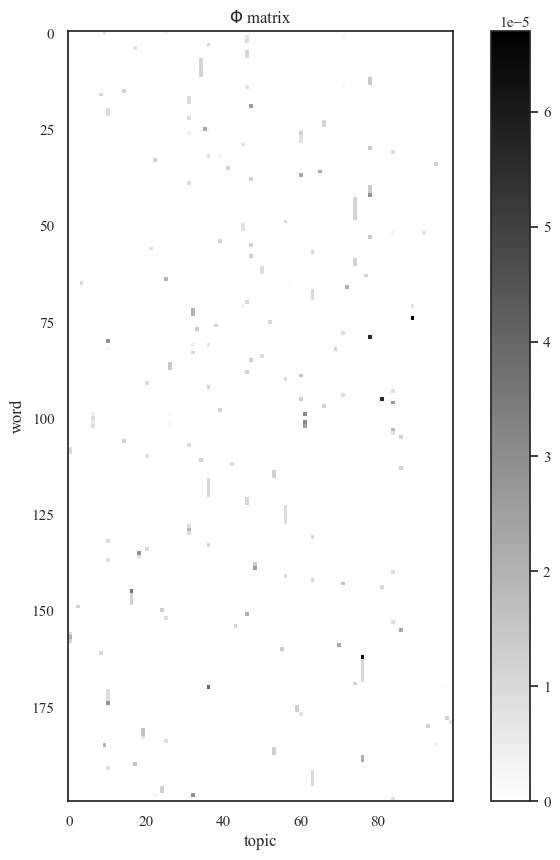

In [ ]:
plot_matrix(phi[:200,:], figsize=(10,10), xlabel='topic', ylabel='word',
            title='$\Phi$ matrix', save='Ria-PLSA_Phi.eps')